### Machine Learning using MNIST Dataset
1. Dataset: https://www.kaggle.com/c/digit-recognizer/data
2. Problem statement: Handwritten digit recognization (0-9)
3. Type of problem: Classification, Supervised
4. Data type: Images stored in csv file
5. Performance Measures: Accuracy, Precision, Recall, Confusion Matrix
6. Feature Importance: Not required
7. Interpretability: We can provide nearest neighbors of the query image to justify why image is classified as 'this'

### Classification Algorithms:
1. K-Nearest Neighbor
2. Logistic Regression (one-vs-rest)
3. SVM Classifier
4. Decision Tree
5. Random Forest
6. XGBoost

### Other Libraries:
1. GridsearchCV for hyperparameter tuning
2. randomsearchCV for hyperparameter tuning
3. Reference Link: https://stackoverflow.com/questions/57426633/what-is-randomsearchcv-and-gridsearchcv

### Data Visualization
1. Principal Component Analysis
2. t-SNE
- Reference Link: https://www.datacamp.com/community/tutorials/introduction-t-sne

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import random

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from pactools.grid_search import GridSearchCVProgressBar

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Read data from two files train.csv and test.csv
1. train.csv file contains images (28 x 28) representaed as rows (784 dimensional) and a label as digit
2. train.csv file contains images (28 x 28) representaed as rows (784 dimensional)
3. sample_submission.csv is the file which contains test image number and corresponding predicted digit 
   Soultion is submitted in sample_submission.csv file

In [4]:
mnist_train = pd.read_csv("train.csv")
mnist_test = pd.read_csv("test.csv")

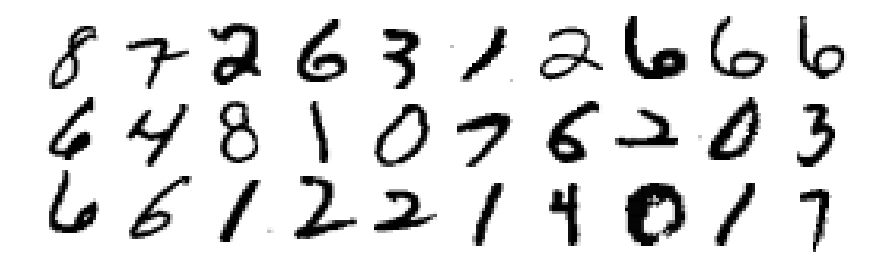

In [3]:
# VISUALIZE DATA
samples = mnist_train.iloc[5000:5030,1:].values
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(samples[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [4]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(mnist_train.shape, mnist_test.shape)

((42000, 785), (28000, 784))


### Check whether data is balanced or imbalanced

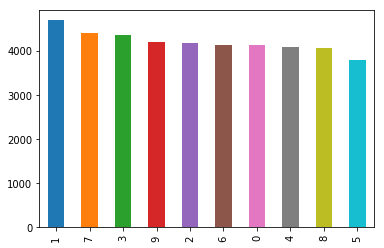

In [6]:
_ = mnist_train['label'].value_counts().plot(kind='bar')
plt.show()

From above figure one can conclude that dataset is balanced

### Principal Component Analysis for data visualization
##### Link : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
we convert 784 dimensional data into 2 dimensional to visualize the data in 2D

In [5]:
X = mnist_train.drop(['label'], axis = 1, inplace = False)
y = mnist_train['label']

In [8]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data = principal_components, columns = ['component1', 'component2'])
final_DF = pd.concat( [principal_DF, mnist_train[['label']]], axis = 1)

['#924770', '#6DCBAC', '#93FDCA', '#34C2DA', '#D035D2', '#D2D6B8', '#A749F9', '#2904CD', '#854A96', '#53E8EB']


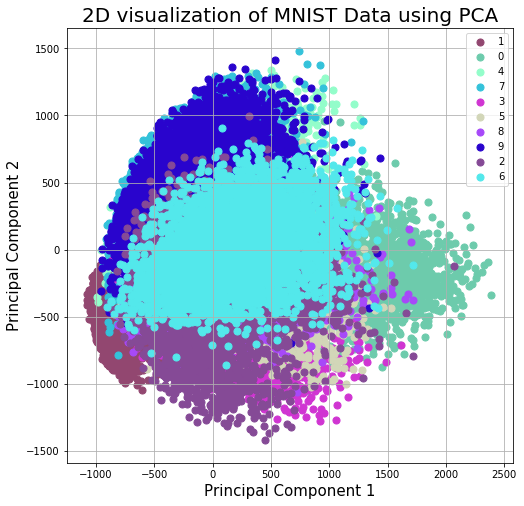

In [9]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of MNIST Data using PCA', fontsize = 20)

targets = list(mnist_train['label'].unique())
random.seed(10)
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['label'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()


#### From above figure it is obvious conclusion is that data is not seperable. However this is not the case as PCA has some drawbacks. 
#### Next technique we try is t-SNE
##### Link: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [15]:
tsneData = TSNE(random_state=10).fit_transform(X)

In [32]:
def ScatterPlotTsne(X,y):
    num_digits= len(np.unique(y))
    palette = np.array(sns.color_palette("hls", num_digits))
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[y.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    txts = []
    for i in range(num_digits):
        xtext, ytext = np.median(X[y == i, :], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            path_effects.Stroke(linewidth=5, foreground="w"),
            path_effects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(-31.7524,38.1141,'0'),
  Text(-2.28285,-48.015,'1'),
  Text(-40.9698,-20.9668,'2'),
  Text(-30.2856,7.64227,'3'),
  Text(52.017,-1.38103,'4'),
  Text(6.68262,21.2271,'5'),
  Text(8.55567,47.4127,'6'),
  Text(14.744,-18.6873,'7'),
  Text(-8.90978,-9.19255,'8'),
  Text(34.0658,-7.63891,'9')])

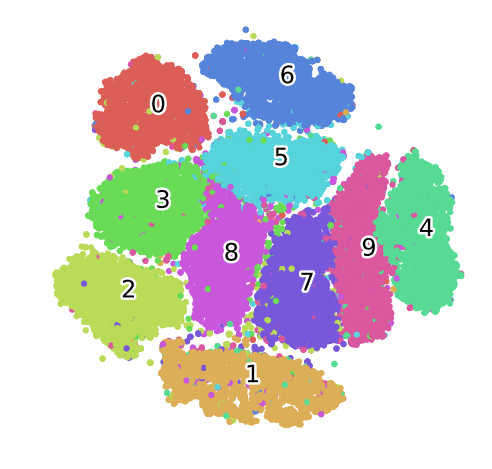

In [33]:
ScatterPlotTsne(tsneData,y)

#### From above figure we can say data is seperable as seperate clusters are formed for each digit

In [9]:
sample_csv = pd.read_csv('sample_submission.csv')

### Divide data into 3 parts
1. Train - To calculate nearest neighbors
2. cross-validation: To find optimal value of k (Hyperparameter)
3. Test: To test final accuracy of the model

In [15]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)

((25200, 784), (10500, 784), (6300, 784), (25200L,), (10500L,), (6300L,))


## KNN Classifier
#### Link: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [16]:
def trainKNN(X_train, y_train, k): 
    """Function to train model using KNN classifier
    Takes argumenst as training dataset, k-value and returns classifier
    """
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    classifier.fit(X_train,y_train)
    return classifier

In [17]:
def predictClassifier(X_test, classifier):
    """Function to predict labels using classifier
       Takes argumenst as test/cv dataset, and returns predicted values by model
    """
    y_pred = classifier.predict(X_test)
    return y_pred

In [18]:
def calculateAccuracy(y_pred, y_test):
    """Function to check accuracy of the model. Takes input arguments as actual and predicted values
       and returns accuracy score
    """
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [19]:
kvalues = [x for x in range(1,50, 6)]
AccuracyList = []
for k in tqdm(kvalues):
    knnClassifier = trainKNN(X_train, y_train, k)
    y_pred = predictClassifier(X_cv, knnClassifier)
    acc = calculateAccuracy(y_pred, y_cv)
    AccuracyList.append(acc)     

100%|██████████| 9/9 [24:48<00:00, 160.06s/it]


In [20]:
AccuracyList

[0.9633333333333334,
 0.9652380952380952,
 0.9611111111111111,
 0.9568253968253968,
 0.9555555555555556,
 0.9517460317460318,
 0.947936507936508,
 0.9457142857142857,
 0.9442857142857143]

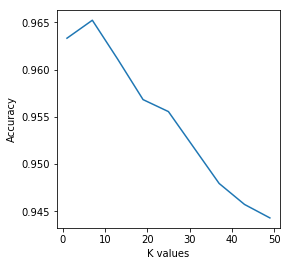

In [21]:
f = plt.figure(figsize = (4,4))
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel('K values', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
plt.show()

In [22]:
clf = trainKNN(X_train,y_train, 9)
y_pred = predictClassifier(X_test, knnClassifier)
acc = calculateAccuracy(y_pred, y_test)
print("Final Accuracy: ",acc)

('Final Accuracy: ', 0.9406666666666667)


################# Confusion Matrix ####################


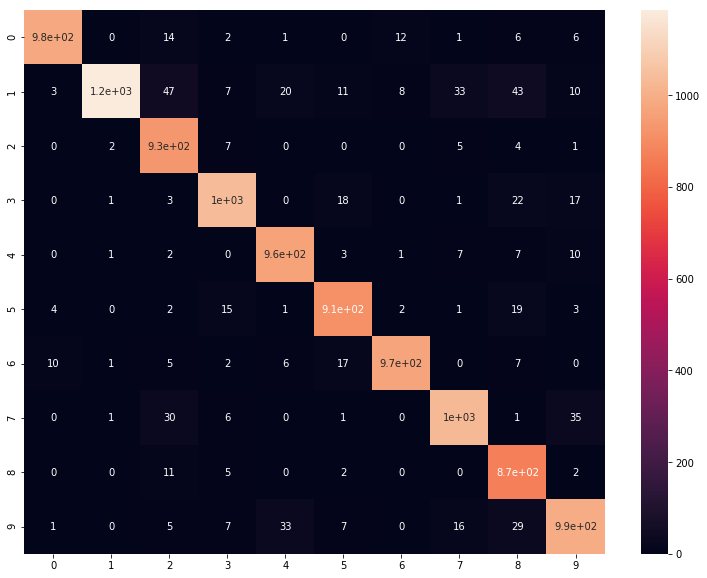

In [73]:
num_digits= np.unique(y)
cf = confusion_matrix(y_pred,y_test, labels = num_digits )
print("################# Confusion Matrix ####################")
fig = plt.figure(figsize = (13,10))
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); #annot=True to annotate cells


## SVM Classifier
###### Link: https://scikit-learn.org/stable/modules/svm.html

### GridSearch SVM Classifier One-vs-Rest

In [ ]:
# refef following link for nested estimators with grid search 
# https://stackoverflow.com/questions/12632992/gridsearch-for-an-estimator-inside-a-onevsrestclassifier
model_to_set = OneVsRestClassifier(SVC())
parameters = {
    "estimator__C": [2**x for x in range(-2,2,1)],
    "estimator__kernel": ["linear","poly","rbf"],
    "estimator__degree":[10**x for x in range(-2,2,1)],
}

model_tunning = GridSearchCV(model_to_set, param_grid=parameters,scoring = "accuracy",cv = 4, verbose = 100)
model_tunning.fit(X_1, y_1)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] estimator__kernel=linear, estimator__C=0.25, estimator__degree=0.01 


In [ ]:
model_tunning.best_estimator_
model_tunning.best_score_

### Basic SVM Classifier

In [19]:
clf = SVC(C=10, gamma=0.001, kernel="rbf")
clf.fit(X_1, y_1)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
y_pred = predictClassifier(X_test,clf)
acc = calculateAccuracy(y_pred, y_test)
print("Final Accuracy: ",acc)

('Final Accuracy: ', 0.11342857142857143)


### Logistic Regression
##### Link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [15]:
logistic = LogisticRegression(solver='saga', tol=1e-3,n_jobs=-1,multi_class = "multinomial")
randVals = []
for i in range(4):
    randVals.append(random.uniform(0,4))
distributions = dict(C=randVals, penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0, verbose = 1000)
search = clf.fit(X_1, y_1)

C:\Users\nilesh\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] penalty=l2, C=0.649643332854 ....................................


C:\Users\nilesh\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV]  penalty=l2, C=0.649643332854, score=0.911375535459, total= 3.0min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s
[CV] penalty=l2, C=0.649643332854 ....................................
[CV]  penalty=l2, C=0.649643332854, score=0.908753214592, total= 2.2min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.2min remaining:    0.0s
[CV] penalty=l2, C=0.649643332854 ....................................
[CV]  penalty=l2, C=0.649643332854, score=0.902057926829, total= 2.4min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.7min remaining:    0.0s
[CV] penalty=l1, C=0.649643332854 ....................................
[CV]  penalty=l1, C=0.649643332854, score=0.909566872918, total= 4.3min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 11.9min remaining:    0.0s
[CV] penalty=l1, C=0.649643332854 ....................................
[CV]  penalty=l1, C=0.649643332854, score=0.906562529765, total= 3.8min
[Parallel(n_jobs=1)]: Done   5 out o

C:\Users\nilesh\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\nilesh\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\nilesh\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\nilesh\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\nilesh\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did 

In [21]:
print(clf.best_estimator_)
print(clf.best_score_)

LogisticRegression(C=0.835543502841, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='saga', tol=0.001, verbose=0, warm_start=False)
0.9074285714285715


In [22]:
best_clf = clf.best_estimator_
best_clf.fit(X_1,y_1)

C:\Users\nilesh\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\nilesh\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\nilesh\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\nilesh\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\nilesh\Anaconda2\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did 

LogisticRegression(C=0.835543502841, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='saga', tol=0.001, verbose=0, warm_start=False)

In [23]:
y_predLR = best_clf.predict(X_test)
acc = accuracy_score(y_test,y_predLR)
print(acc)

0.9125714285714286


### Decision Tress Classifier
##### Link: https://scikit-learn.org/stable/modules/tree.html

In [81]:
maxDepth = [4,6,8,10,12,15,20,30,50,80, 120]
trainAcc = []
CVAcc = []
for depth in tqdm(maxDepth):
    clfDT = DecisionTreeClassifier(criterion='gini',max_depth = depth)
    clfDT.fit(X_train, y_train)
    y_predDTtrain = clfDT.predict(X_train)
    y_predDTcv = clfDT.predict(X_cv)
    accTr = accuracy_score(y_train, y_predDTtrain)
    accCv = accuracy_score(y_cv, y_predDTcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)    

100%|██████████| 11/11 [01:17<00:00,  8.96s/it]


In [82]:
print(trainAcc)
print(CVAcc)

[0.6329761904761905, 0.7385714285714285, 0.8384920634920635, 0.9097619047619048, 0.9556746031746032, 0.9852380952380952, 0.9958730158730159, 0.9993253968253968, 1.0, 1.0, 1.0]
[0.6395238095238095, 0.7396825396825397, 0.813968253968254, 0.8447619047619047, 0.8511111111111112, 0.8514285714285714, 0.8525396825396825, 0.8482539682539683, 0.8493650793650793, 0.8485714285714285, 0.8507936507936508]


In [9]:
def plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVAcc,label='CV Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()
    
    trainError = [1-x for x in trainAcc]
    CVError    = [1-x for x in CVAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVError,label='CV Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

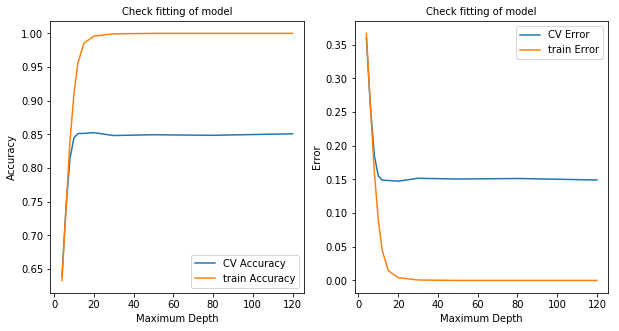

In [84]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth)

In [27]:
clfDT = clfDT = DecisionTreeClassifier(criterion='gini',max_depth = 15)
clfDT.fit(X_train, y_train)
y_pred = clfDT.predict(X_test)

print("Final Accuracy DT: ",accuracy_score(y_test,y_pred))

('Final Accuracy DT: ', 0.8492380952380952)


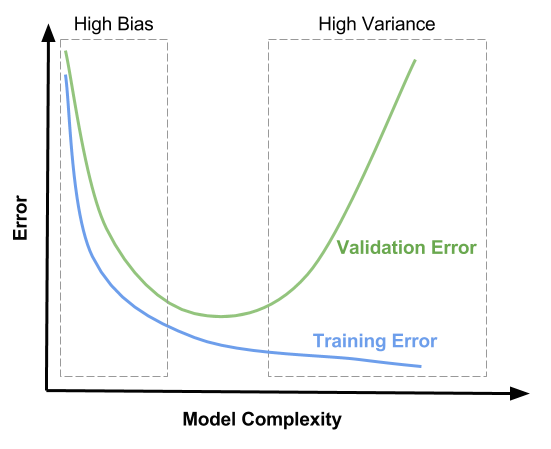

### Random Forest Classifier
##### Link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [85]:
NoEstimators = [50,70,100,130,150,190,230,290,370,450,550,700]
trainAcc = []
CVAcc = []

In [86]:
for est in tqdm(NoEstimators):
    clfRF = RandomForestClassifier(n_estimators=est, criterion='gini')
    clfRF.fit(X_train, y_train)
    y_predRFtrain = clfRF.predict(X_train)
    y_predRFcv = clfRF.predict(X_cv)
    accTr = accuracy_score(y_train, y_predRFtrain)
    accCv = accuracy_score(y_cv, y_predRFcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv) 

100%|██████████| 12/12 [14:58<00:00, 129.22s/it]


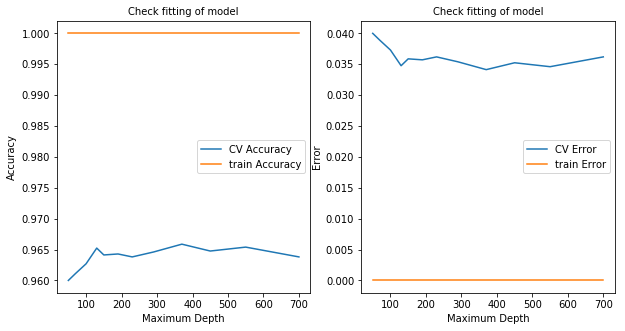

In [87]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,NoEstimators)

In [90]:
maxAccuracy = max(CVAcc)
maxAccuracy

0.9658730158730159

In [28]:
clfRF = RandomForestClassifier(n_estimators=370, criterion='gini')
clfRF.fit(X_train, y_train)
y_predRF = clfRF.predict(X_test)
print("Final Accuracy RF: ",accuracy_score(y_test,y_predRF))

('Final Accuracy RF: ', 0.964)


### XGBOOST
##### Link: https://xgboost.readthedocs.io/en/latest/

In [1]:
# !pip install xgboost

In [7]:
etaVals = [0.1,0.3,0.5,0.6,0.8,0.9] # Shrinkage parameter as hyperparameter
#max_depth parameter we are changing as we know increasing this value may turn model into overfit
trainAcc = []
CVAcc = []
for e in etaVals:
    model = XGBClassifier(eta = e, nthread = 2)
    model.fit(X_train,y_train)
    y_predXGtrain = model.predict(X_train)
    y_predXGcv = model.predict(X_cv)
    accTr = accuracy_score(y_train, y_predXGtrain)
    accCv = accuracy_score(y_cv, y_predXGcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)     

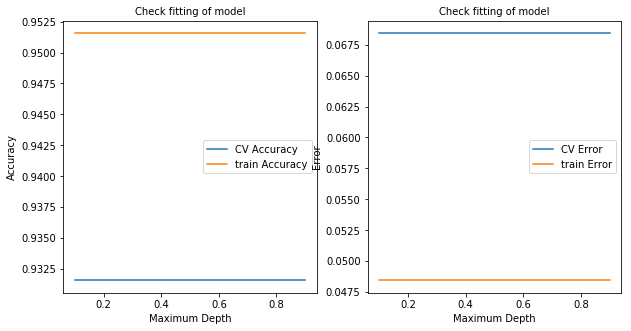

In [10]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,etaVals)

In [12]:
def plotTestandTrainAccuracyAndError(TestAcc,trainAcc,maxDepth):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,TestAcc,label='Test Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()
    
    trainError = [1-x for x in trainAcc]
    TestError    = [1-x for x in TestAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,TestError,label='Test Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

100%|██████████| 6/6 [1:12:02<00:00, 717.96s/it]


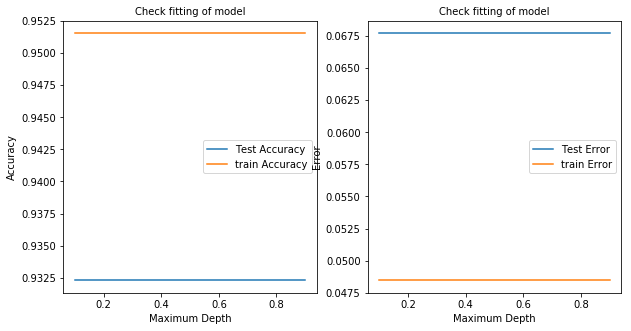

In [14]:
TestAcc = []
for e in tqdm(etaVals):
    model = XGBClassifier(eta = e, nthread = 2)
    model.fit(X_train,y_train)
    y_predXGTest = model.predict(X_test)
    accTest = accuracy_score(y_test, y_predXGTest)
    TestAcc.append(accTest)

plotTestandTrainAccuracyAndError(TestAcc,trainAcc,etaVals)

### Final Accuracies
    1. KNN                   0.94066  
    2. Logistic Regression   0.9125
    3. SVM                   0.11 (Something went wrong!!!)
    4. Decision Tree         0.84923
    5. Random Forest         0.964
    6. XGBOOST               0.9325